#ANALISE PNAD- Lucas Borges e Felipe Goichman

Mr.Gold quer dar inicio a uma universidade, porém antes ele deve analisar alguns dados da PNAD para centralizar
suas atenções no seu publico alvo, para isso, nós, alunos da faculdade de engenharia do Insper fomos responsáveis
para fazer essa analise para o Mr.Gold.

###Leitura do formato de arquivo e Dividindo as categorias por idades

In [135]:
import pandas as pd

In [136]:
import os

In [137]:
dados = pd.read_table("pes2013A.txt.gz", sep=" ", compression="gzip")

In [138]:
dados.rename(columns={"V8005":"IDADE"}, inplace=True)

In [139]:
bins = list(range(0,121,12))

In [140]:
coluna_idades = pd.cut(dados.IDADE, bins, include_lowest=True)

In [141]:
dados["FAIXA_IDADES"] = coluna_idades

In [142]:
dados_ordenados = dados.sort(["FAIXA_IDADES", "IDADE"])

In [143]:
dados.rename(columns={"V6003":"EDUCACAO"}, inplace=True)

In [144]:
dados.EDUCACAO = dados.EDUCACAO.astype('category')
dados.EDUCACAO.cat.categories = ('1', '2', '3', '4', 'Universitarios','6', '7', '8', '9', '10','11')

                                               GERANDO GRÁFICOS

In [145]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

TABELA 1 - FAIXA DE IDADE DOS ESTUDANTES UNIVERSITÁRIOS

In [146]:
ct = pd.crosstab(dados.FAIXA_IDADES, dados[(dados.EDUCACAO=='Universitarios')].EDUCACAO)
divide = ct.sum().sum()
porcentagem = ct*100/divide
teste1 = porcentagem.iloc[:,4:5]
teste1

EDUCACAO,Universitarios
FAIXA_IDADES,
"[0, 12]",0.000000
"(12, 24]",54.645949
"(24, 36]",32.815399
"(36, 48]",10.034014
"(48, 60]",2.280458
"(60, 72]",0.170068
"(72, 84]",0.054113
"(84, 96]",0.000000
"(96, 108]",0.000000


GRÁFICO 1 - FAIXA DE IDADE DOS ESTUDANTES UNIVERSITÁRIOS

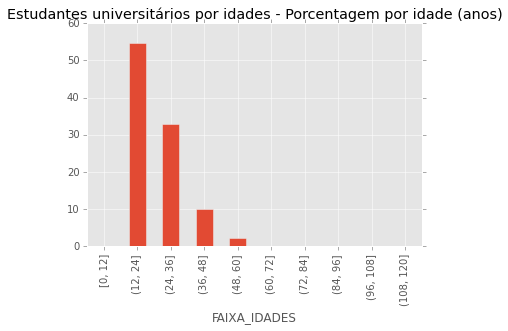

In [147]:
pd.DataFrame.plot(kind='bar', data= teste1 , legend=False, title = 'Estudantes universitários por idades - Porcentagem por idade (anos)')

In [148]:
dados.rename(columns={"V0302":"SEXO"}, inplace=True)
dados.SEXO = dados.SEXO.astype('category')
dados.SEXO.cat.categories = ('Masculino','Feminino')
su = pd.crosstab(dados.SEXO, dados[(dados.EDUCACAO=='Universitarios')].EDUCACAO)  # su = Sexo dos universitários
divide_sexo = su.sum().sum()
porcentagem_sexo = su*100/divide_sexo
tabela_sexo = porcentagem_sexo.iloc[:,4:5]

TABELA 2 - SEXO DOS ESTUDANTES UNIVERSITÁRIOS

In [149]:
tabela_sexo

EDUCACAO,Universitarios
SEXO,
Masculino,42.617502
Feminino,57.382498


GRÁFICO 2 - SEXO DOS ESTUDANTES UNIVERSITÁRIOS

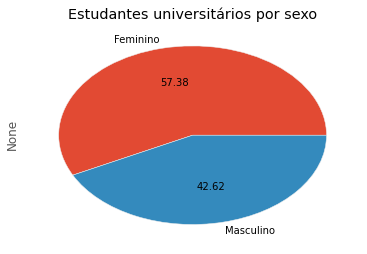

In [150]:
pd.DataFrame.plot(kind='pie', data=dados[dados.EDUCACAO=="Universitarios"].SEXO.value_counts(), legend=False,autopct="%0.2f", title = 'Estudantes universitários por sexo')

In [ ]:
dados.rename(columns={"V0404":"COR"}, inplace=True)
dados.COR = dados.COR.astype('category')
dados.COR.cat.categories = ('Indígeno','Branco','Negro','Amarelo','Pardo', 'Não declarado')
ce = pd.crosstab(dados.COR, dados[(dados.EDUCACAO=='Universitarios')].EDUCACAO)  # cu = Cor dos universitários
divide_cor = ce.sum().sum()
porcentagem_cor = ce*100/divide_cor
tabela3 = porcentagem_cor.iloc[:,4:5]

TABELA 3 - RAÇA/COR DOS ESTUDANTES UNIVERSITÁRIOS

In [152]:
tabela3

EDUCACAO,Universitarios
COR,
Indígeno,0.286024
Branco,54.158936
Negro,6.779530
Amarelo,0.633890
Pardo,38.141620
Não declarado,0.000000


GRÁFICO 3 - RAÇA/COR DOS ESTUDANTES UNIVERSITÁRIOS

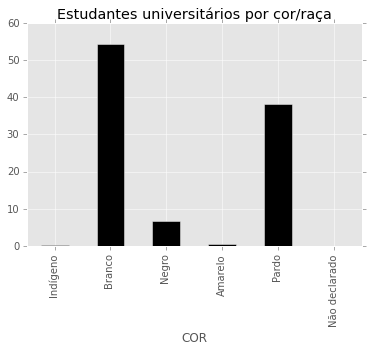

In [153]:
pd.DataFrame.plot(kind='bar', data=tabela3, color=('black'), legend=False, title = 'Estudantes universitários por cor/raça')

In [154]:
dados.rename(columns={"V4707":"TRABALHO"}, inplace=True)
dados.TRABALHO = dados.TRABALHO.astype('category')
dados.TRABALHO.cat.categories = ('Até 14 horas','15 a 39 horas','40 a 44 horas','45 a 48 horas','49 horas ou mais')
tu = pd.crosstab(dados.TRABALHO, dados[(dados.EDUCACAO=='Universitarios')].EDUCACAO)  # tu = Jornada de trabalho dos universitários
divide_trab = tu.sum().sum()
porcentagem_trab= tu*100/divide_trab
tabela4 = porcentagem_trab.iloc[:,4:5]

TABELA 4 - JORNADA DE TRABALHO DOS ESTUDANTES UNIVERSITÁRIOS

In [155]:
tabela4

EDUCACAO,Universitarios
TRABALHO,
Até 14 horas,4.337464
15 a 39 horas,28.181602
40 a 44 horas,52.716873
45 a 48 horas,8.460439
49 horas ou mais,6.303622


GRÁFICO 4 - JORNADA DE TRABALHO DOS ESTUDANTES UNIVERSITÁRIOS

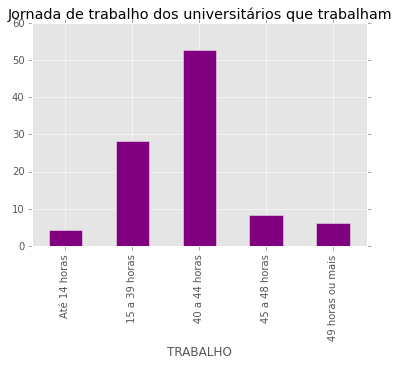

In [156]:
pd.DataFrame.plot(kind='bar', data=tabela4, color=('purple'), legend=False, title = 'Jornada de trabalho dos universitários que trabalham')

In [157]:
dados.rename(columns={"V061111":"INTERNET"}, inplace=True)
dados.INTERNET = dados.INTERNET.astype('category')
dados.INTERNET.cat.categories = ('Sem Internet','Com Internet')
dados.INTERNET.value_counts()
Int = pd.crosstab(dados.INTERNET, dados[(dados.EDUCACAO=='Universitarios')].EDUCACAO).iloc[:,4:5]  # tu = Jornada de trabalho dos universitários
divide_int = Int.sum().sum()
porcentagem_Int= Int*100/divide_int

TABELA 5 - ACESSO A INTERNET DOS ESTUDANTES UNIVERSITÁRIOS

In [158]:
porcentagem_Int

EDUCACAO,Universitarios
INTERNET,
Sem Internet,22.520107
Com Internet,77.479893


GRÁFICO 5 - ACESSO A INTERNET DOS ESTUDANTES UNIVERSITÁRIOS

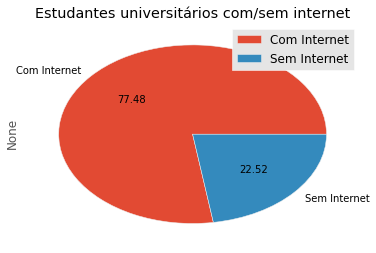

In [159]:
pd.DataFrame.plot(kind='pie', data=dados[dados.EDUCACAO=='Universitarios'].INTERNET.value_counts(), autopct='%0.2f', legend=True, title = 'Estudantes universitários com/sem internet')